In [2]:
#Primer grafa s SDCTD številom
g = Graph([(0,1),(1,2)])
h = g.complement()  

#Primer grafa brez SDCTD števila
m = Graph([(0,1),(1,2),(1,3)])

In [3]:
#Osnivni CLP program, popravi po zgledu Dominacijsko_stevilo
p = MixedIntegerLinearProgram(maximization = False)
x = p.new_variable(binary = True)
p.set_objective(sum([x[v] for v in g]))

for v in g.vertices():
    p.add_constraint(sum((x[w] + x[v]) for w in g.neighbors(v)) >= 1) 

zaustavi = False
    
for v in g.vertices():
    neighbors_complement = h.neighbors(v)  
    if neighbors_complement:  
        p.add_constraint(sum(x[w] for w in neighbors_complement) >= 1)
        
    else:
        print("Slaba, graf nima SDCTD dominacije")  
        zaustavi = True
        break 
        
if not zaustavi == True:
    p.solve()
    x = p.get_values(x)
    print([v for v, i in x.items() if i == 1])  

Slaba, graf nima SDCTD dominacije


In [5]:
#Dominacijska množica, popravi
def SDCTD_mnozica(g):
    h = g.complement()

    p = MixedIntegerLinearProgram(maximization = False)
    x = p.new_variable(binary = True)
    p.set_objective(sum([x[v] for v in g]))

    for v in g.vertices():
        p.add_constraint(sum((x[w] + x[v]) for w in g.neighbors(v)) >= 1) 

    zaustavi = False

    for v in g.vertices():
        neighbors_complement = h.neighbors(v)  
        if neighbors_complement:  
            p.add_constraint(sum(x[w] for w in neighbors_complement) >= 1)

        else:
            print("Slaba, graf nima SDCTD dominacije")  
            zaustavi = True
            break 

    if not zaustavi == True:
        p.solve()
        x = p.get_values(x)
        return([v for v, i in x.items() if i == 1]) 
    else:
        return None

In [4]:
#SDCTD število, popravi
def SDCTD_stevilo(g):
    h = g.complement()

    p = MixedIntegerLinearProgram(maximization = False)
    x = p.new_variable(binary = True)
    p.set_objective(sum([x[v] for v in g]))

    for v in g.vertices():
        p.add_constraint(sum((x[w] + x[v]) for w in g.neighbors(v)) >= 1) 

    zaustavi = False

    for v in g.vertices():
        neighbors_complement = h.neighbors(v)  
        if neighbors_complement:  
            p.add_constraint(sum(x[w] for w in neighbors_complement) >= 1)

        else:
            print("Slaba, graf nima SDCTD dominacije")  
            zaustavi = True
            break 

    if not zaustavi == True:
        p.solve()
        x = p.get_values(x)
        return(sum(1 for i in x.values() if i == 1))
    else:
        return None
 

In [0]:
#Sedaj želimo kodo spremeniti tako, da bo sprejela grafe neke velikosti in nato za vsako vrsto vrnila dominacijsko število. 
#Najdemo pogoj, za katerega ima graf sploh lahko SDCTD število. Vsaj koliko povezav mora imeti graf reda n, da ima sploh lahko SDCTD število.
#Spremeni max_st in min_st tako, da ne bo vrnilo napisov pred resitvijo. Tudi malce polepsaj kodo.



In [6]:
#To je koda za SDCTD število, zgornji kodi popravi!!

def Dominacijsko_stevilo(g):
    h = g.complement()

    p = MixedIntegerLinearProgram(maximization=False)
    x = p.new_variable(binary=True)
    p.set_objective(sum([x[v] for v in g.vertices()]))

    for v in g.vertices():
        neighbors = g.neighbors(v)  
        if neighbors:
            p.add_constraint(sum((x[w] + x[v]) for w in neighbors) >= 1)
        else:
            p.add_constraint(x[v] == 1)
            
    zaustavi = False

    for v in g.vertices():
        neighbors_complement = h.neighbors(v)
        if neighbors_complement:
            p.add_constraint(sum(x[w] for w in neighbors_complement) >= 1)
        else:
            print("Slaba, graf nima SDCTD dominacije")
            zaustavi = True
            break

    if not zaustavi:
            p.solve()  
            x_values = p.get_values(x)  
            prestej_izbrana_vozlisca = sum(1 for i in x_values.values() if i == 1)
            izbrana_vozlisca = [v for v, i in x_values.items() if i == 1]
            #print("Izbrana vozlišča za graf:", izbrana_vozlisca)    
            return prestej_izbrana_vozlisca 
    else:
        return None  



In [7]:
def max_st(n):
    all_graphs = list(graphs(n))
    
    seznam = []
    valid_graphs = []  # This will store graphs that meet SDCTD domination conditions

    for g in all_graphs:
        dom_number = Dominacijsko_stevilo(g)
        
        if dom_number is not None:
            seznam.append(dom_number)
            valid_graphs.append(g)
    
    if not valid_graphs:
        return None  # If no valid graph is found, return None or handle accordingly

    max_value = max(seznam)
    
    # Find all graphs that have the maximum SDCTD domination number
    graphs_with_max = [valid_graphs[i] for i in range(len(valid_graphs)) if seznam[i] == max_value]
    
    # Print all graphs with the maximum SDCTD domination number
    print(f"Graphs with the maximum SDCTD domination number ({max_value}):")
    for g in graphs_with_max:
        g.show()




Slaba, graf nima SDCTD dominacije
Slaba, graf nima SDCTD dominacije
Graphs with the maximum SDCTD domination number (3):


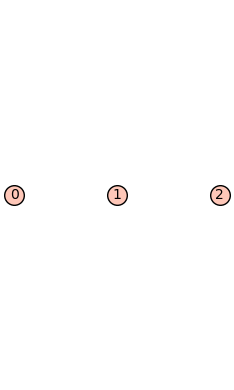

In [9]:
max_st(3)

In [6]:
#Koda seveda ne izpisuje grafov, ki za katere ne obstaja SDCTD dominacijsko število
def min_st(n):
    # Generate all graphs on n vertices
    all_graphs = list(graphs(n))
    
    # List to hold the SDCTD domination numbers of valid graphs
    seznam = []
    valid_graphs = []  # This will store graphs that meet SDCTD domination conditions
    
    # Calculate SDCTD domination number for each graph and validate
    for g in all_graphs:
        dom_number = Dominacijsko_stevilo(g)
        
        # Assuming your function should return None or similar if SDCTD domination is not met
        if dom_number is not None:
            seznam.append(dom_number)
            valid_graphs.append(g)
    
    if not valid_graphs:
        print("No graph satisfies the SDCTD domination condition.")
        return None  # If no valid graph is found, return None or handle accordingly
    
    # Find the minimum SDCTD domination number
    min_value = min(seznam)
    
    # Find all graphs that have the minimum SDCTD domination number
    graphs_with_min = [valid_graphs[i] for i in range(len(valid_graphs)) if seznam[i] == min_value]
    
    # Print all graphs with the minimum SDCTD domination number
    print(f"Graphs with the minimum SDCTD domination number ({min_value}):")
    for g in graphs_with_min:
        g.show()


Slaba, graf nima SDCTD dominacije
Slaba, graf nima SDCTD dominacije
Slaba, graf nima SDCTD dominacije
Slaba, graf nima SDCTD dominacije
Graphs with the minimum SDCTD domination number (2):


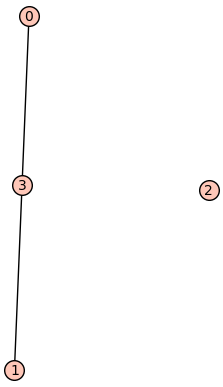

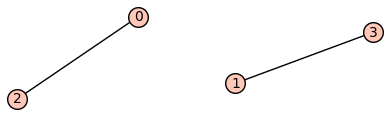

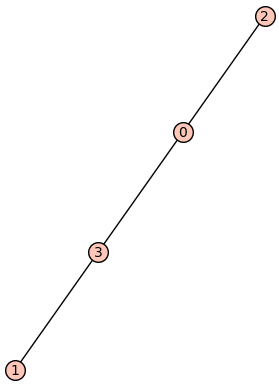

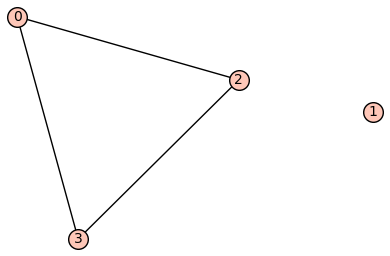

In [12]:
min_st(4)

4


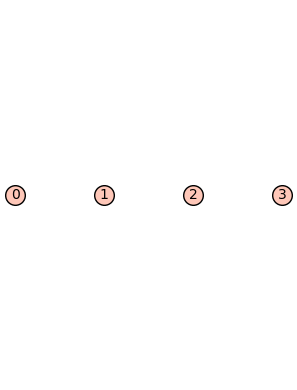

3


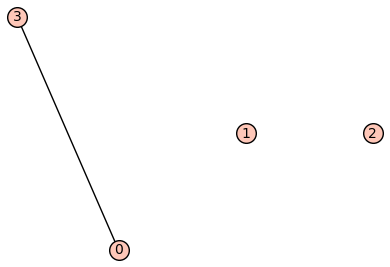

2


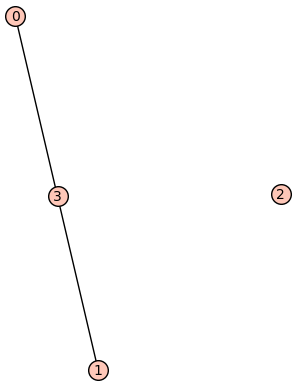

Slaba, graf nima SDCTD dominacije
None


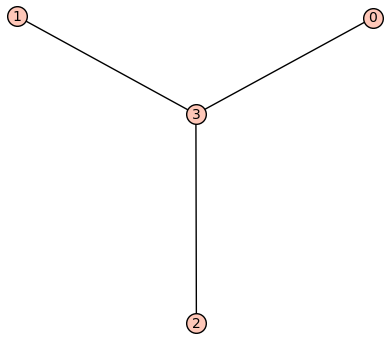

2


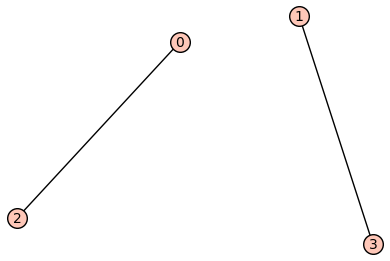

2


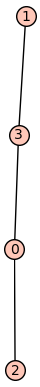

2


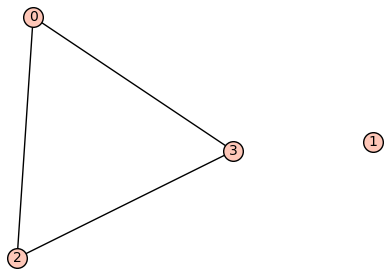

Slaba, graf nima SDCTD dominacije
None


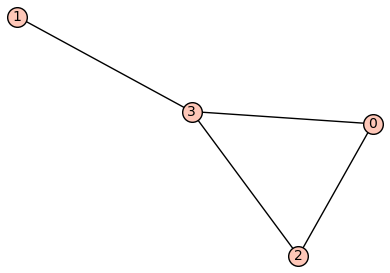

4


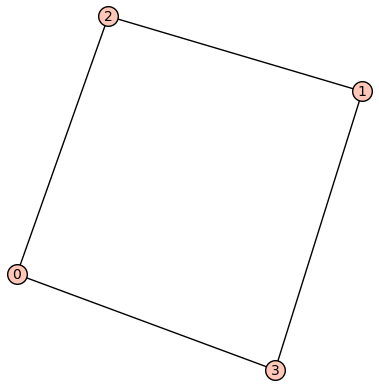

Slaba, graf nima SDCTD dominacije
None


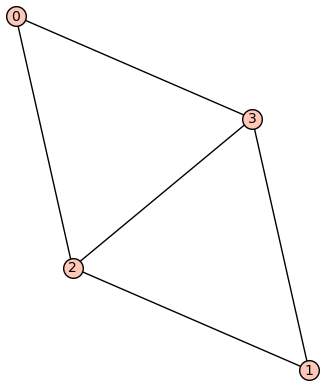

Slaba, graf nima SDCTD dominacije
None


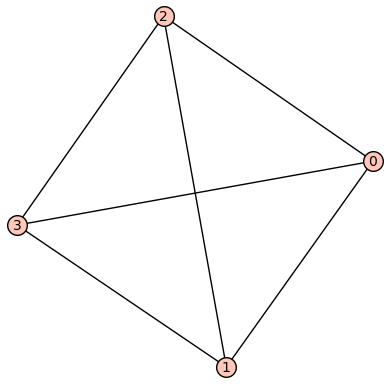

In [8]:

for q in graphs(4):
    print(Dominacijsko_stevilo(q))
    
    q.show()

In [1]:
#koda ni preverjena
def select_diameter_2_graphs(n):
    # Generate all graphs on n vertices
    all_graphs = list(graphs(n))
    
    # List to store graphs with diameter 2
    diameter_2_graphs = []
    
    # Check the diameter of each graph
    for g in all_graphs:
        if g.diameter() == 2:
            diameter_2_graphs.append(g)
    
    # Print the graphs with diameter 2
    if diameter_2_graphs:
        print(f"Graphs with diameter 2 on {n} vertices:")
        for g in diameter_2_graphs:
            g.show()  # Display the graph
    else:
        print(f"No graphs with diameter 2 found on {n} vertices.")

In [11]:
#neka ideja, vendar spremeni originalno funkcijo select_diameter_2_graphs def SDCTD_2premer(n):
    vsi_grafi = select_diameter_2_graphs(n)
    for g in vsi_grafi:
        return (Dominacijsko_stevilo(g))
        

Graphs with diameter 2 on 4 vertices:


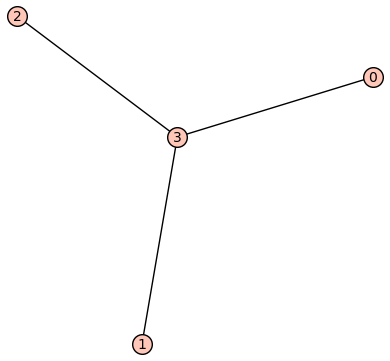

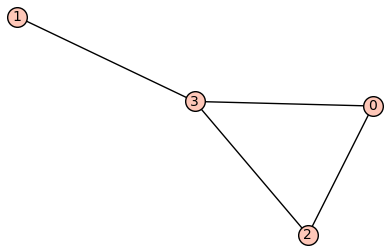

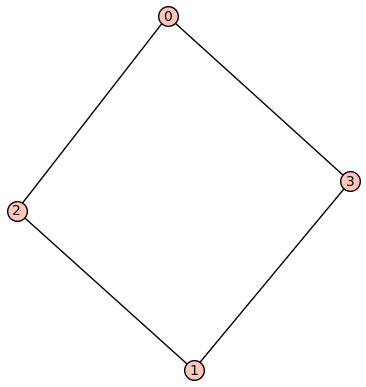

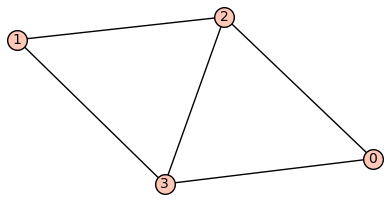

TypeError: 'NoneType' object is not iterable

In [12]:
SDCTD_2premer(4)

Graphs with diameter 2 on 4 vertices:


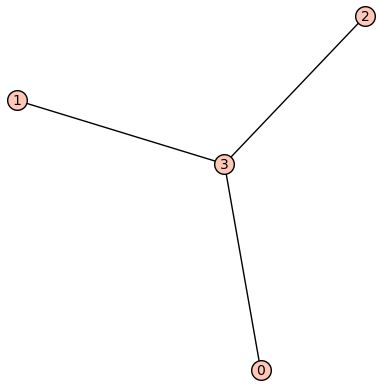

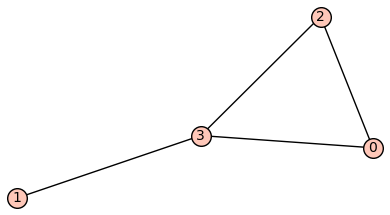

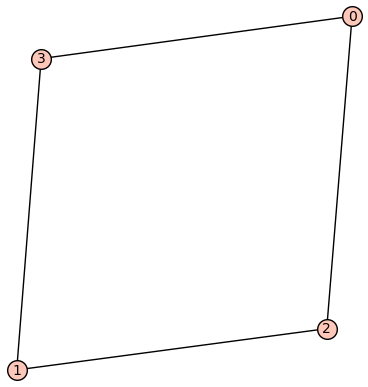

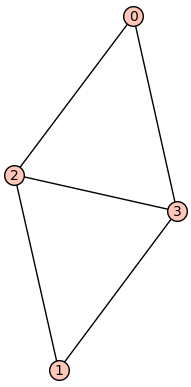

In [10]:
select_diameter_2_graphs(4)

In [10]:
# morda pravilen stochastic search pristop k CLP. 

import random
from sage.graphs.graph import Graph

# Function to check if a subset of vertices forms an SDCTD set
def is_sdctd(g, h, subset):
    # Dominating Set Condition: Each vertex in g is either in subset or has a neighbor in subset
    for v in g.vertices():
        if v not in subset and not any(w in subset for w in g.neighbors(v)):
            return False  # Dominating set condition not met

    # Complement Total Dominating Condition: Each vertex in h has at least one neighbor in subset
    for v in h.vertices():
        if not any(w in subset for w in h.neighbors(v)):
            return False  # Complement total dominating condition not met
    
    return True

# Random search function to find an approximate minimum SDCTD set
def random_search_sdctd(g, iterations=1000, inclusion_prob=0.5):
    h = g.complement()  # Compute the complement of the graph
    best_sdctd = g.vertices()  # Initialize with the full set of vertices as the initial best solution
    best_size = len(best_sdctd)

    for _ in range(iterations):
        # Generate a random subset of vertices with probability inclusion_prob
        random_subset = [v for v in g.vertices() if random.random() < inclusion_prob]

        # Check if the subset is a valid SDCTD set
        if is_sdctd(g, h, random_subset):
            subset_size = len(random_subset)
            # Update the best solution if the current subset is smaller
            if subset_size < best_size:
                best_sdctd = random_subset
                best_size = subset_size

    return best_sdctd, best_size

# Example usage with a small graph
g = Graph({0: [1, 2], 1: [2, 3], 2: [3], 3: []})  # Replace with your graph definition
best_sdctd, best_size = random_search_sdctd(g, iterations=1000, inclusion_prob=0.5)
print("Approximate minimum SDCTD set:", best_sdctd)
print("Size of the SDCTD set:", best_size)


Approximate minimum SDCTD set: [0, 1, 2, 3]
Size of the SDCTD set: 4


Approximate minimum SDCTD set: [0, 5, 12, 14, 16, 23, 40, 41, 42, 48, 49, 52, 54, 55, 56, 59, 61, 63, 65, 67, 70, 71, 72, 73, 76, 77, 83, 87, 91, 92, 97, 98, 99]
Size of the SDCTD set: 33


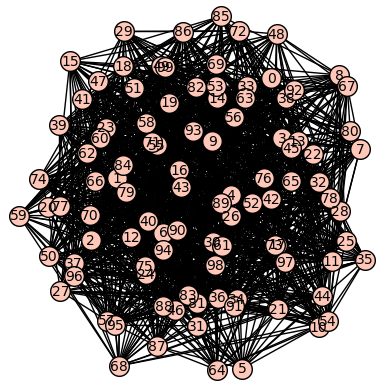

In [19]:
g = Graph(100)  # Initialize a graph with 10 vertices
g.add_edges([(i, j) for i in range(100) for j in range(i+1, 100) if random.random() < 0.3])
best_sdctd, best_size = random_search_sdctd(g, iterations=1000, inclusion_prob=0.5)
print("Approximate minimum SDCTD set:", best_sdctd)
print("Size of the SDCTD set:", best_size)
g.show()
